<a href="https://colab.research.google.com/github/EduardoLDB2001/EduardoLDB2001/blob/main/Cluster_Clientes_IEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Você possui um shopping e, por meio de cartões de associação, tem alguns dados básicos sobre seus clientes como ID do Cliente, idade, gênero, renda anual e pontuação de despesas.                                                          

**Problema**: Você possui o shopping e deseja entender os clientes, como quem pode ser facilmente convergido [Clientes-alvo], para que o sentido possa ser dado à equipe de marketing e planejar a estratégia de acordo.


**Objetivo**:A clusterização é uma técnica poderosa de aprendizado não supervisionado usada para segmentar dados em grupos homogêneos. Ao aplicar clusterização em dados de clientes de um shopping, como renda anual e pontuação de despesas, podemos identificar padrões e segmentos distintos dentro da base de clientes. Isso permite que a equipe de marketing direcione esforços e recursos de forma mais eficaz, desenvolvendo estratégias personalizadas para diferentes grupos de clientes. Por exemplo, identificando um grupo de clientes de alta renda com alta pontuação de despesas, podemos direcionar campanhas promocionais exclusivas para esse segmento, potencialmente aumentando as vendas e a satisfação do cliente.


# Importação

In [ ]:
# Importar as bibliotecas básicas
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tarefa 3: Import o K-means.
from sklearn.cluster import KMeans

In [ ]:
# Importar arquivo do Drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/cr.io/Gestão/Projetos/Projetos/IEEE/Cluster Clientes /Mall_Customers.csv')


Mounted at /content/drive


In [ ]:
# Renomear colunas
df = df.rename(columns={
    'Annual Income (k$)': 'annual_income_k$',
    'Spending Score (1-100)': 'spending_score',
    'Gender': 'gender',
    'Age': 'age',
    'CustomerID': 'customer_id',
})


Tarefa 2: Crie um DataFrame apenas com colunas Annual Income e Spending Score.


# Tratamento de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       200 non-null    int64 
 1   gender            200 non-null    object
 2   age               200 non-null    int64 
 3   annual_income_k$  200 non-null    int64 
 4   spending_score    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Novas colunas

In [ ]:
df['gender_bool'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['gender_bool'] = df['gender_bool'].astype(int)

In [ ]:
# Criar coluna de anual income real
df['annual_income'] = df['annual_income_k$'] * 1000

In [ ]:
# Criar a nova coluna 'age_group' baseada nas faixas etárias
bins = [18, 35, 50, 70]
labels = ['18-35', '36-50', '51-70']

df['age_group2'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df['age_group2'] = df['age_group2'].astype('object')

In [ ]:
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df['age_group'] = df['age_group'].astype('object')

In [ ]:
df['spending_score/annual_income'] = df['spending_score'] / df['annual_income_k$']

# Análises

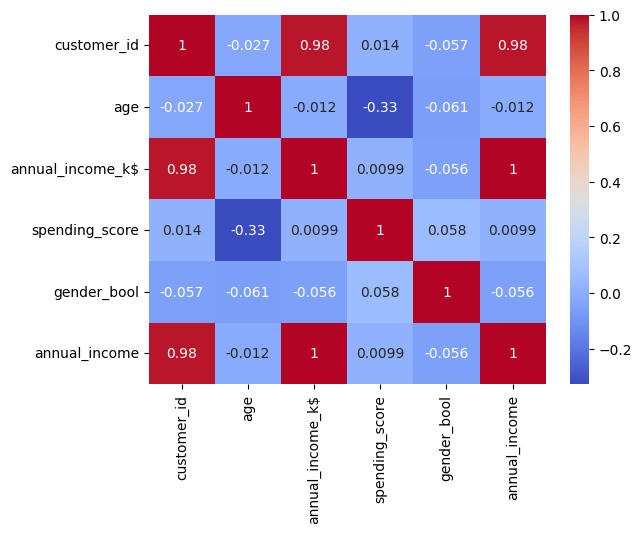

In [ ]:
# Matriz de correlação
df_without_age_group = df.drop(columns=['age_group', 'gender', 'age_group2' ])
corr_matrix = df_without_age_group.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Gênero

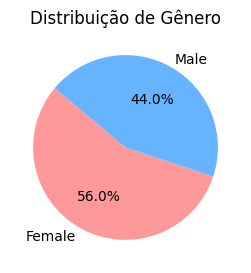

In [ ]:
# Contar a quantidade de cada gênero
gender_counts = df['gender'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(4, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribuição de Gênero')
plt.show()

Tarefa 1: Visualize o scatteplot em matriz com hue = “Gender”. Dá para notar alguma diferença? Se sim, qual e por quê?


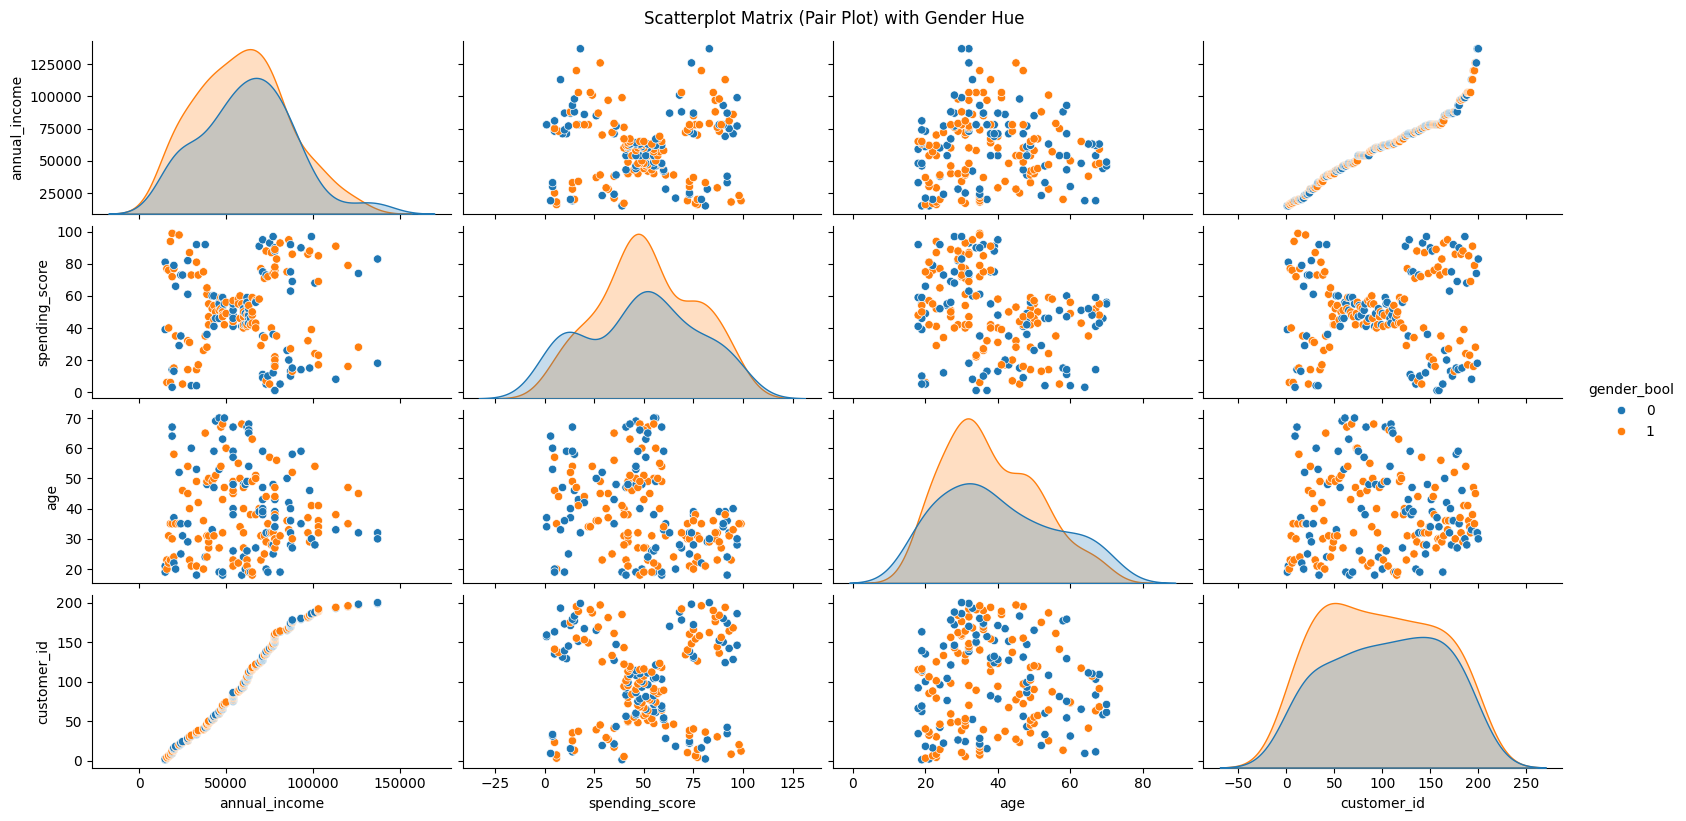

In [ ]:
sns.pairplot(df, vars=['annual_income', 'spending_score', 'age', 'customer_id'], hue='gender_bool', height=2, aspect=2)
plt.suptitle('Scatterplot Matrix (Pair Plot) with Gender Hue', y=1.02)
plt.show()

In [ ]:
stats = df.groupby('gender')[['annual_income', 'spending_score', 'age', 'customer_id']].describe()
pd.set_option('display.max_columns', None)

print(stats)

       annual_income                                                         \
               count          mean           std      min      25%      50%   
gender                                                                        
Female         112.0  59250.000000  26011.951515  16000.0  39750.0  60000.0   
Male            88.0  62227.272727  26638.373182  15000.0  45500.0  62500.0   

                          spending_score                                  \
            75%       max          count       mean       std  min   25%   
gender                                                                     
Female  77250.0  126000.0          112.0  51.526786  24.11495  5.0  35.0   
Male    78000.0  137000.0           88.0  48.511364  27.89677  1.0  24.5   

                            age                                           \
         50%   75%   max  count       mean        std   min    25%   50%   
gender                                                                 

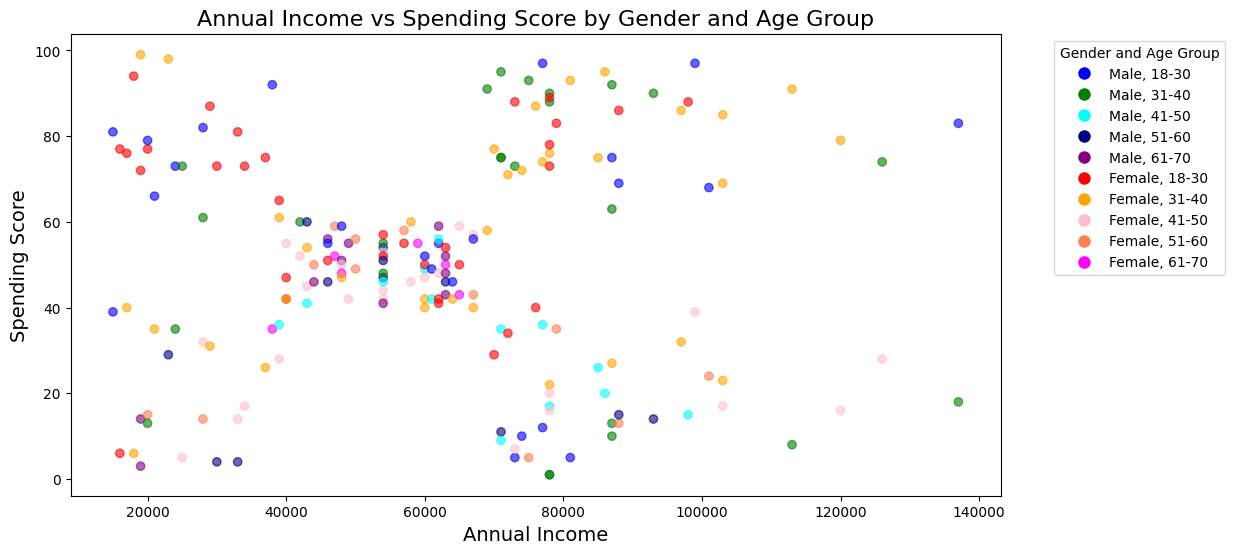

In [ ]:
# Criar a coluna combinada 'gender_age_group'
df['gender_age_group'] = df['gender'] + ', ' + df['age_group']
df = df.dropna(subset=['gender_age_group'])

# Mapear as cores usando o dicionário color_map
color_map = {
    'Male, 18-30': 'blue',
    'Male, 31-40': 'green',
    'Male, 41-50': 'cyan',
    'Male, 51-60': 'navy',
    'Male, 61-70': 'purple',
    'Female, 18-30': 'red',
    'Female, 31-40': 'orange',
    'Female, 41-50': 'pink',
    'Female, 51-60': 'coral',
    'Female, 61-70': 'magenta'
}
colors = df['gender_age_group'].map(color_map)

# Criar o scatter plot (annual_income vs spending_score)
plt.figure(figsize=(12, 6))
plt.scatter(df['annual_income'], df['spending_score'], c=colors, alpha=0.6)
plt.title('Annual Income vs Spending Score by Gender and Age Group', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)

# Criar legendas manualmente
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10,
                      label=gender_age_group)
           for gender_age_group, color in color_map.items()]
plt.legend(title='Gender and Age Group', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.show()


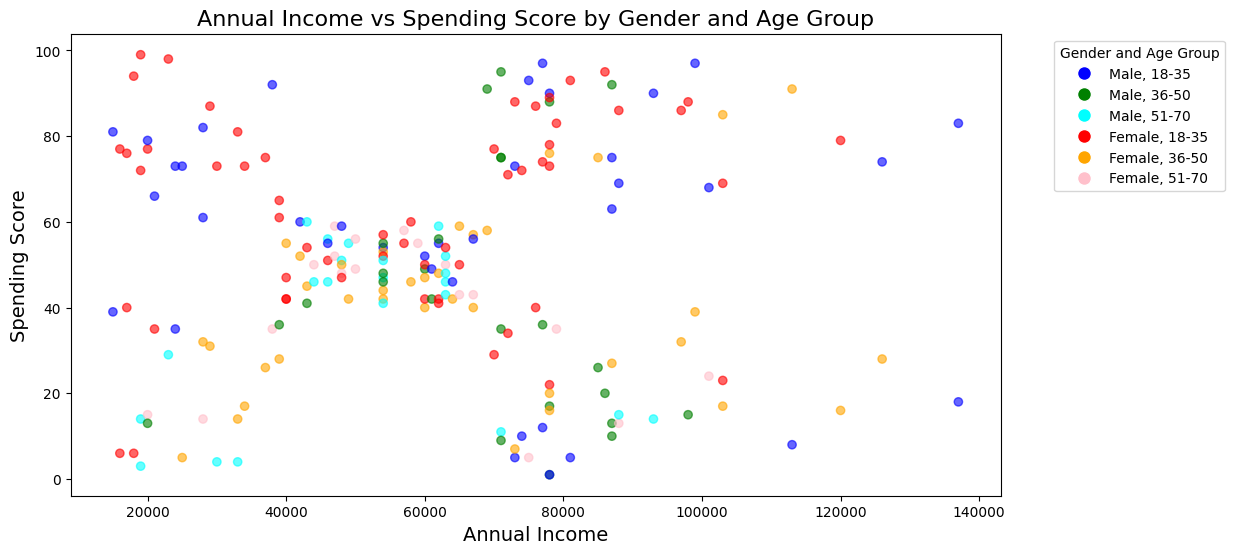

In [ ]:
# Criar a coluna combinada 'gender_age_group'
df['gender_age_group2'] = df['gender'] + ', ' + df['age_group2']
df = df.dropna(subset=['gender_age_group2'])

# Mapear as cores usando o dicionário color_map
color_map = {
    'Male, 18-35': 'blue',
    'Male, 36-50': 'green',
    'Male, 51-70': 'cyan',
    'Female, 18-35': 'red',
    'Female, 36-50': 'orange',
    'Female, 51-70': 'pink',

}
colors = df['gender_age_group2'].map(color_map)

# Criar o scatter plot (annual_income vs spending_score)
plt.figure(figsize=(12, 6))
plt.scatter(df['annual_income'], df['spending_score'], c=colors, alpha=0.6)
plt.title('Annual Income vs Spending Score by Gender and Age Group', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)

# Criar legendas manualmente
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10,
                      label=gender_age_group)
           for gender_age_group, color in color_map.items()]
plt.legend(title='Gender and Age Group', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.show()

<ipython-input-22-919d51e4512a>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(df['age'].min(), df['age'].max(), 5))
<ipython-input-22-919d51e4512a>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(df['age'].min(), df['age'].max(), 5))


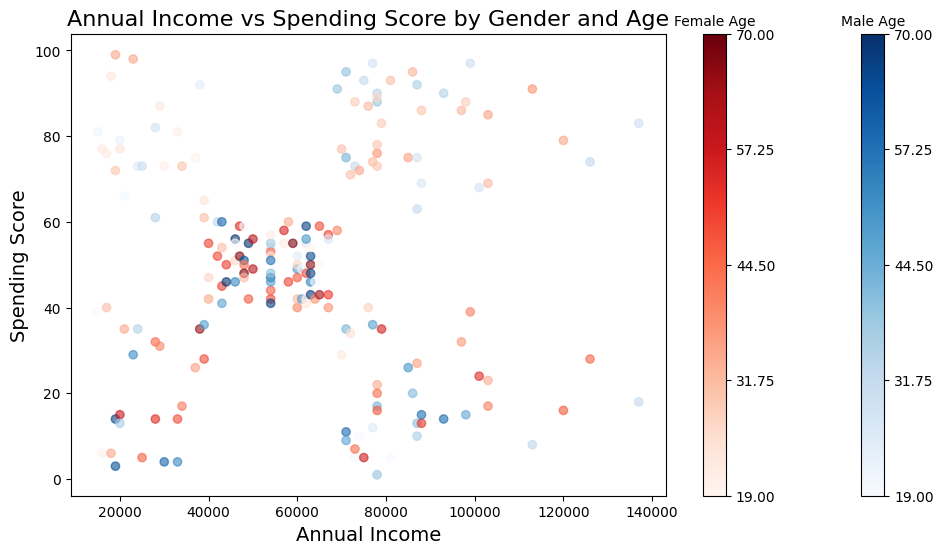

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Criar uma função para normalizar os valores de idade
normalize_age = mcolors.Normalize(vmin=df['age'].min(), vmax=df['age'].max())

# Criar colormaps específicos para cada gênero
male_cmap = plt.cm.Blues
female_cmap = plt.cm.Reds

# Mapear as cores baseadas no gênero e na idade
colors = df.apply(lambda row: male_cmap(normalize_age(row['age'])) if row['gender'] == 'Male'
                  else female_cmap(normalize_age(row['age'])), axis=1)

# Criar o scatter plot (annual_income vs spending_score)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['annual_income'], df['spending_score'], c=colors, alpha=0.6)
plt.title('Annual Income vs Spending Score by Gender and Age', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)


# Criar uma barra de cores para mostrar a escala de idade
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=normalize_age)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(df['age'].min(), df['age'].max(), 5))
cbar.ax.set_title('Male Age', fontsize=10)

sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=normalize_age)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(df['age'].min(), df['age'].max(), 5))
cbar.ax.set_title('Female Age', fontsize=10)

# Mostrar o gráfico
plt.show()



## Idade

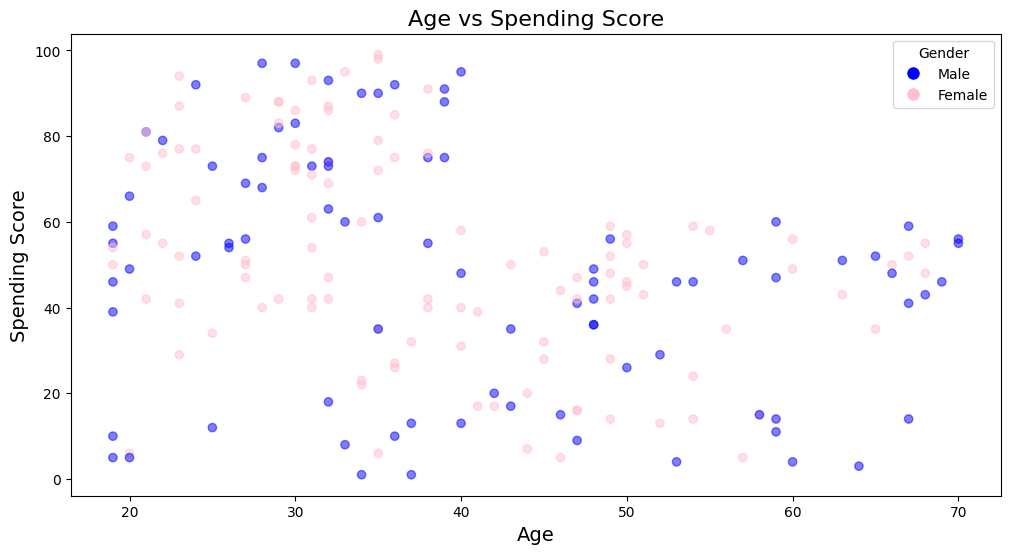

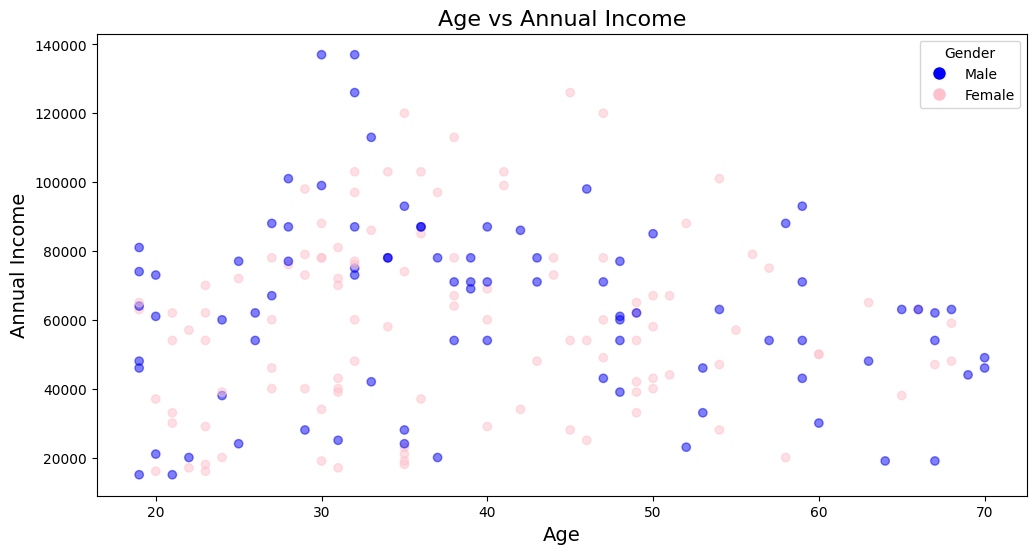

In [ ]:
# Definir as cores para cada gênero
colors = df['gender_bool'].map({0: 'blue', 1: 'pink'})  # 'blue' para homens, 'pink' para mulheres

# Criar o primeiro scatter plot (age vs spending_score)
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['spending_score'], c=colors, alpha=0.5)
plt.title('Age vs Spending Score', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)

# Adicionar uma legenda manualmente
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Male'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Female')]
plt.legend(title='Gender', handles=handles)

# Mostrar o primeiro gráfico
plt.show()

# Criar o segundo scatter plot (age vs annual_income)
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['annual_income'], c=colors, alpha=0.5)
plt.title('Age vs Annual Income', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Income', fontsize=14)

# Adicionar a mesma legenda manualmente
plt.legend(title='Gender', handles=handles)

# Mostrar o segundo gráfico
plt.show()

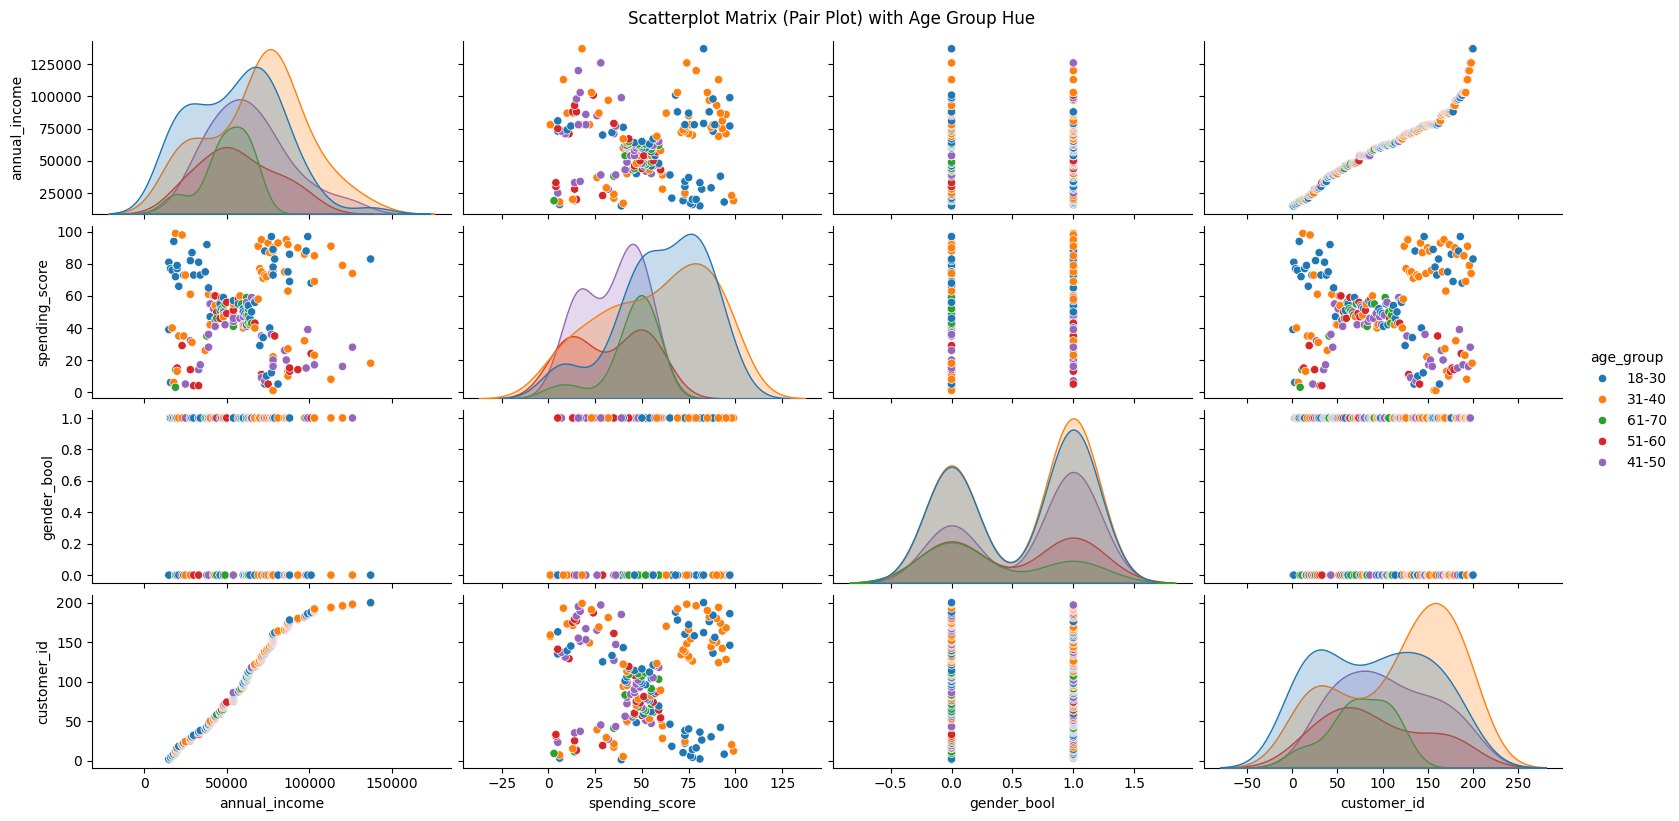

In [ ]:
sns.pairplot(df, vars=['annual_income', 'spending_score', 'gender_bool', 'customer_id'], hue='age_group', height=2, aspect=2)
plt.suptitle('Scatterplot Matrix (Pair Plot) with Age Group Hue', y=1.02)
plt.show()

In [ ]:
stats = df.groupby('age_group')[['annual_income', 'spending_score', 'age', 'customer_id', 'gender_bool']].describe()
pd.set_option('display.max_columns', None)

print(stats)

          annual_income                                                \
                  count          mean           std      min      25%   
age_group                                                               
18-30              58.0  55482.758621  27020.616807  15000.0  33250.0   
31-40              60.0  68633.333333  29168.689195  17000.0  46750.0   
41-50              38.0  63605.263158  24152.152244  25000.0  44250.0   
51-60              23.0  56695.652174  23026.535646  20000.0  43500.0   
61-70              17.0  50000.000000  14313.455208  19000.0  46000.0   

                                      spending_score                        \
               50%      75%       max          count       mean        std   
age_group                                                                    
18-30      60000.0  75500.0  137000.0           58.0  61.103448  23.843562   
31-40      72500.0  87000.0  137000.0           60.0  57.500000  28.875243   
41-50      60500.0  77750

## Score x Renda

<ipython-input-26-47db3c375b0f>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Customer ID')


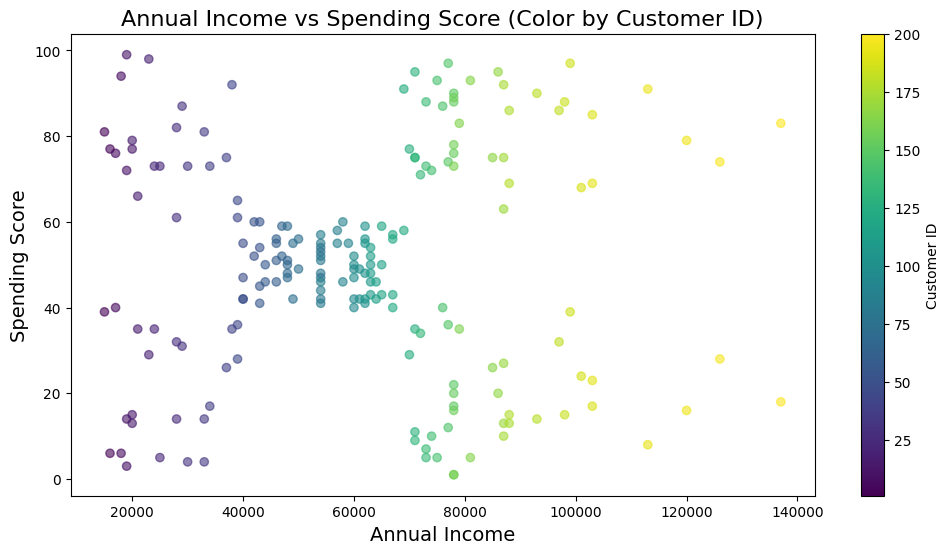

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Normalizar os valores de customer_id para a escala de cores
normalize_customer_id = mcolors.Normalize(vmin=df['customer_id'].min(), vmax=df['customer_id'].max())
cmap = plt.cm.viridis  # Usar um colormap padrão, como 'viridis'

# Criar o scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['annual_income'], df['spending_score'], c=df['customer_id'], cmap=cmap, norm=normalize_customer_id, alpha=0.6)
plt.title('Annual Income vs Spending Score (Color by Customer ID)', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)

# Adicionar barra de cores para Customer ID
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize_customer_id)
sm.set_array([])
plt.colorbar(sm, label='Customer ID')

# Mostrar o gráfico
plt.show()


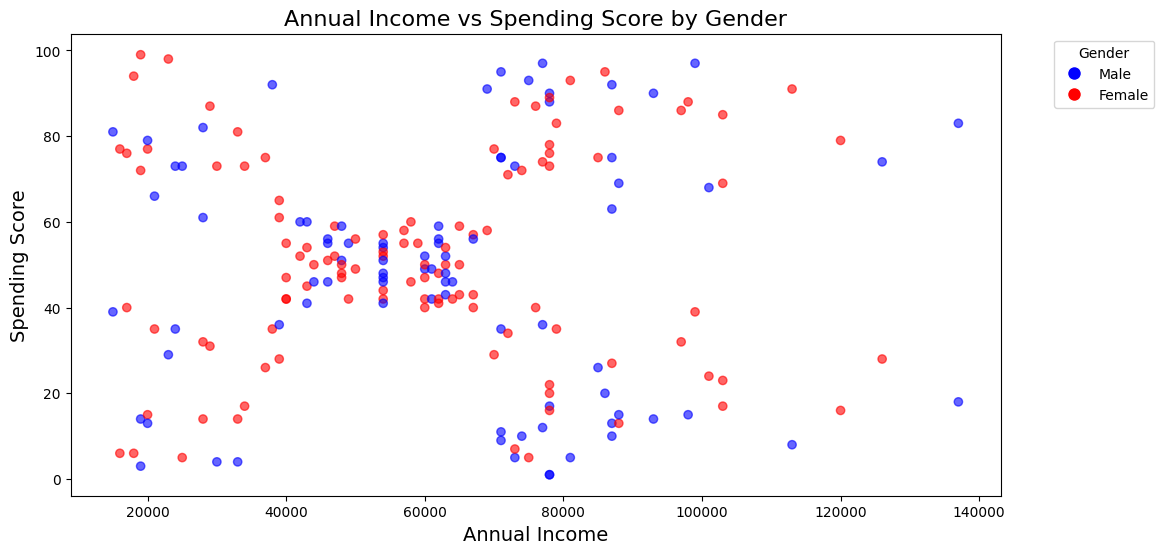

In [ ]:
# Mapear as cores baseadas no gênero
color_map = {'Male': 'blue', 'Female': 'red'}
colors = df['gender'].map(color_map)

# Criar o scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['annual_income'], df['spending_score'], c=colors, alpha=0.6)
plt.title('Annual Income vs Spending Score by Gender', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)

# Adicionar legendas para o gênero
legend_labels = ['Male', 'Female']
legend_colors = ['blue', 'red']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in zip(legend_labels, legend_colors)]
plt.legend(title='Gender', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.show()


<ipython-input-28-abf6d43f53a8>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Age')


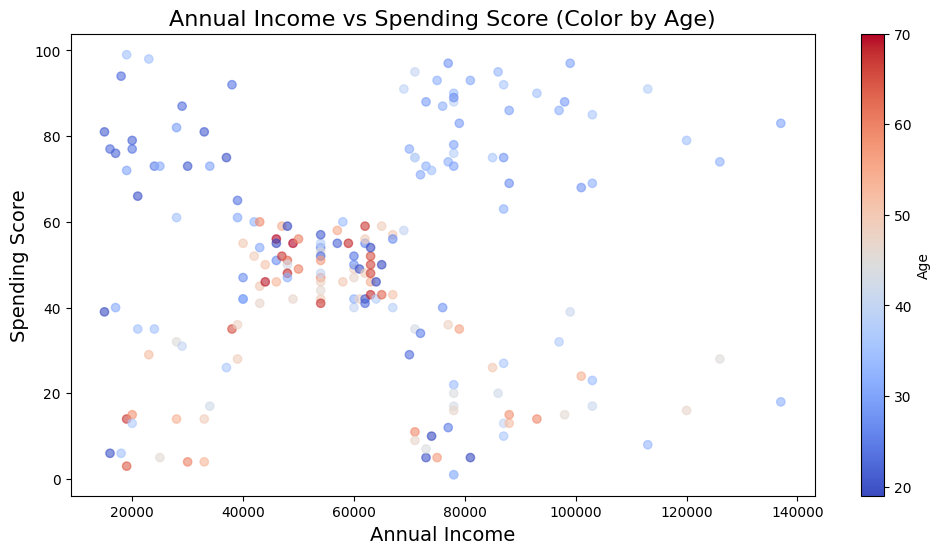

In [ ]:
# Normalizar os valores de age para a escala de cores
normalize_age = mcolors.Normalize(vmin=df['age'].min(), vmax=df['age'].max())
cmap = plt.cm.coolwarm  # Usar um colormap como 'coolwarm' para a escala de idade

# Criar o scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['annual_income'], df['spending_score'], c=df['age'], cmap=cmap, norm=normalize_age, alpha=0.6)
plt.title('Annual Income vs Spending Score (Color by Age)', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)

# Adicionar barra de cores para Age
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize_age)
sm.set_array([])
plt.colorbar(sm, label='Age')

# Mostrar o gráfico
plt.show()


## Hipóteses

1. Homens ganham mais
2. Mulheres tem o score melhor
3. O id foi dado de acordo com a renda, forte correlação de (0.98)
4. Público mais novo tem um score melhor, mesmo com renda mais baixa
5. Público mais velho tem score mediano e renda mais baixa
6. Público de idade central tem score mais baixo e renda mais alta

# Clusterização

## Clusterização (padrão)

Tarefa 4: Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters.


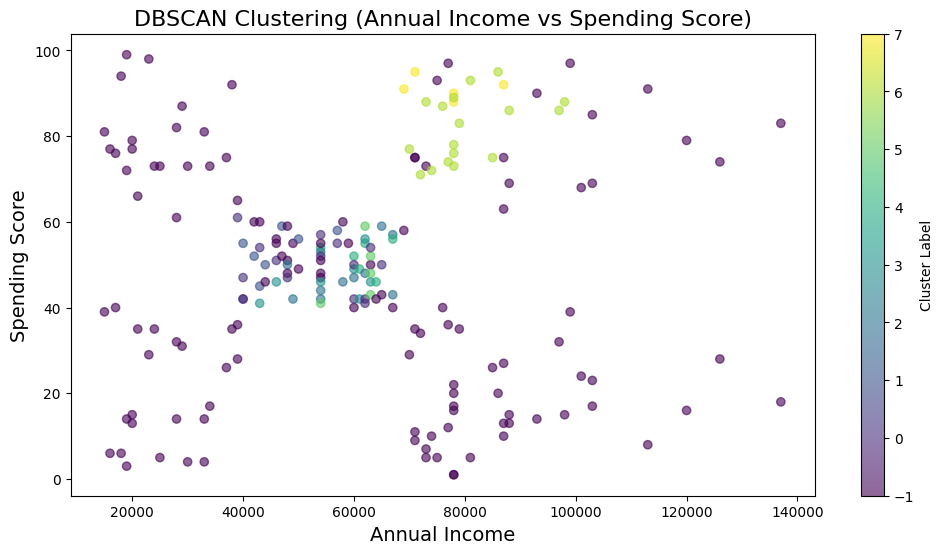

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionar as features para clustering
features = ['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']
X = df[features]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustar os parâmetros conforme necessário
df['cluster'] = dbscan.fit_predict(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['annual_income'], df['spending_score'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (Annual Income vs Spending Score)', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
# Adicionar a coluna de cluster ao DataFrame
df['cluster'] = dbscan.labels_

# Selecionar apenas as colunas de interesse e a coluna de cluster
df_cluster_analysis = df[['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income', 'cluster']]

# Calcular a correlação da coluna de cluster com as outras colunas
correlation_with_cluster = df_cluster_analysis.corr()['cluster'].drop('cluster')

# Exibir a correlação
print(correlation_with_cluster)


age                            -0.014619
spending_score                  0.417801
gender_bool                     0.026273
annual_income                   0.186050
spending_score/annual_income   -0.055944
Name: cluster, dtype: float64


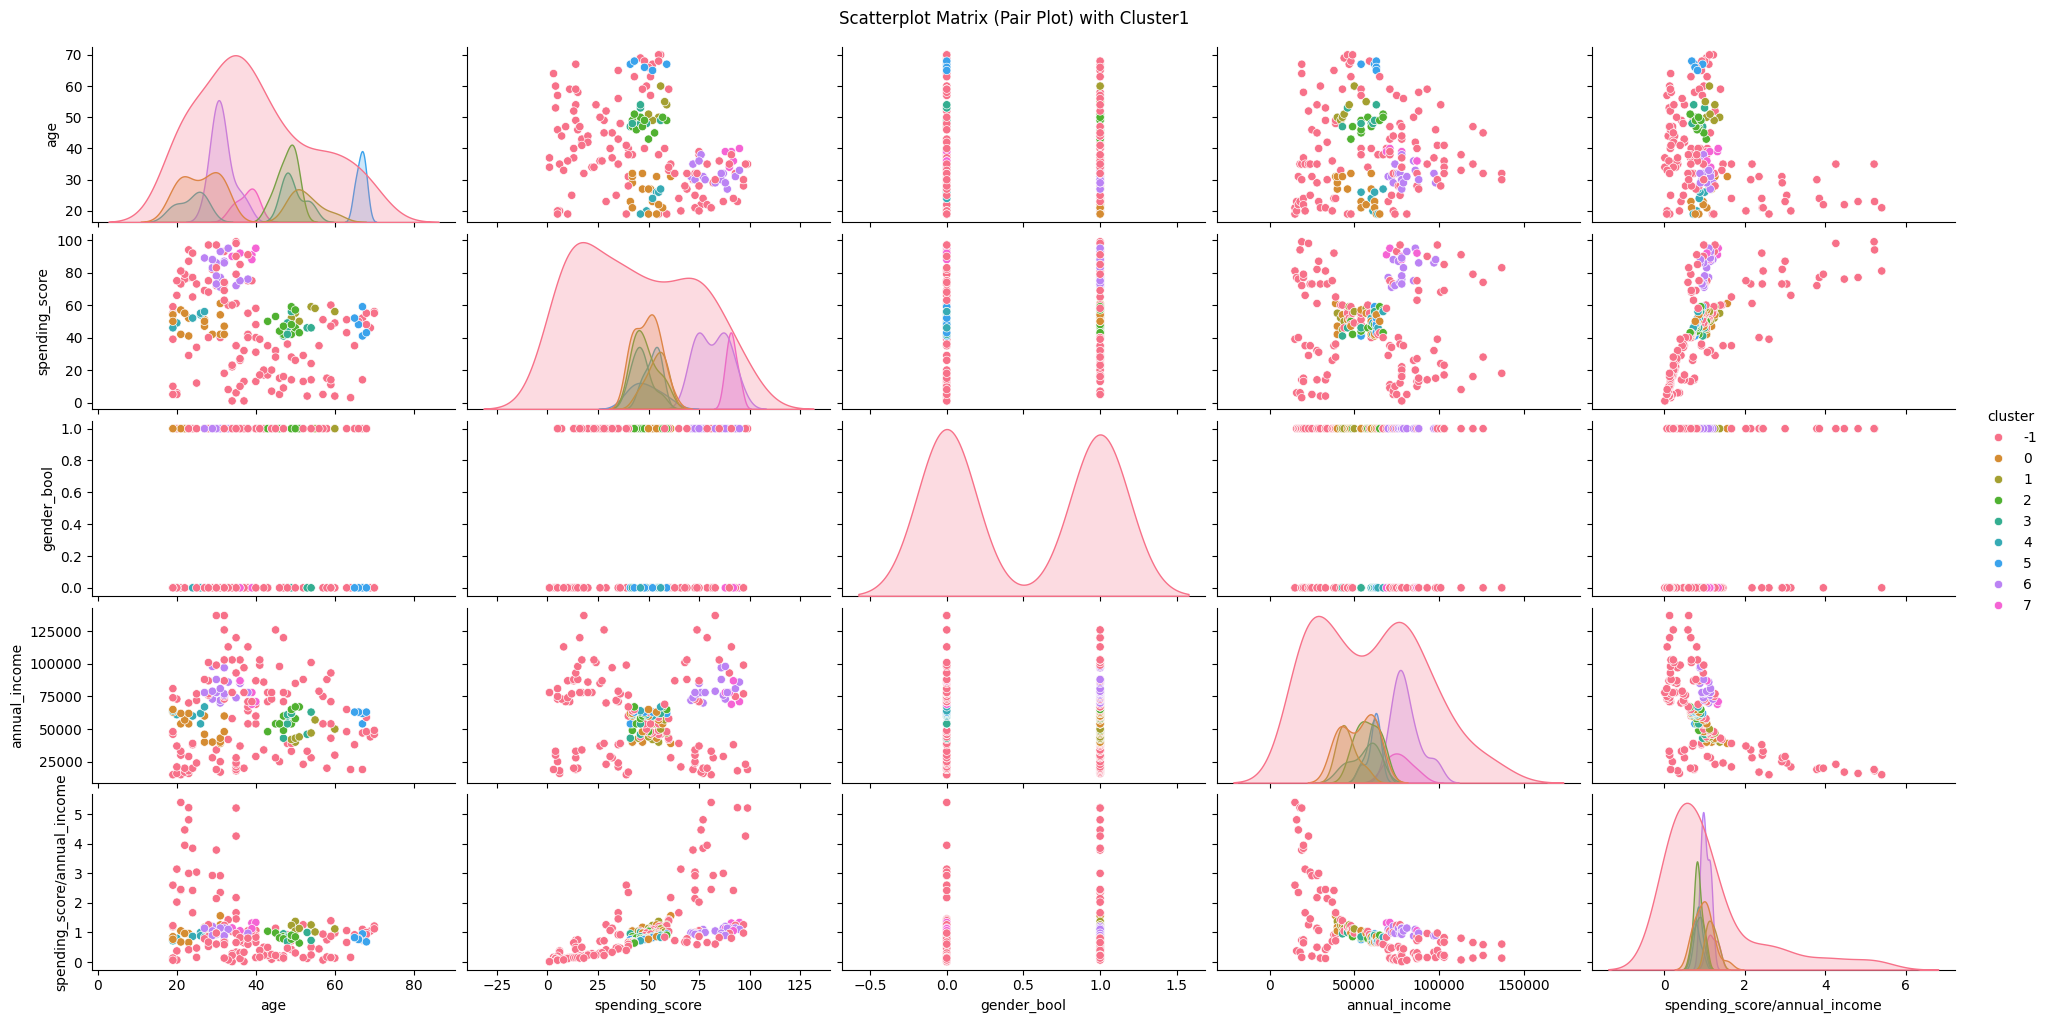

In [ ]:
# Definir uma paleta de cores distinta para os clusters
palette = sns.color_palette('husl', len(df['cluster'].unique()))

# Criar o pairplot com a paleta de cores personalizada
pairplot = sns.pairplot(df, vars=['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income'],
                        hue='cluster', palette=palette, height=2, aspect=2)

# Ajustar o título
plt.suptitle('Scatterplot Matrix (Pair Plot) with Cluster1', y=1.02)

# Mostrar o gráfico
plt.show()


## Curva de cotovelo

Tarefa 5: Crie uma curva de cotovelo. Qual seria o número ideal de clusters?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

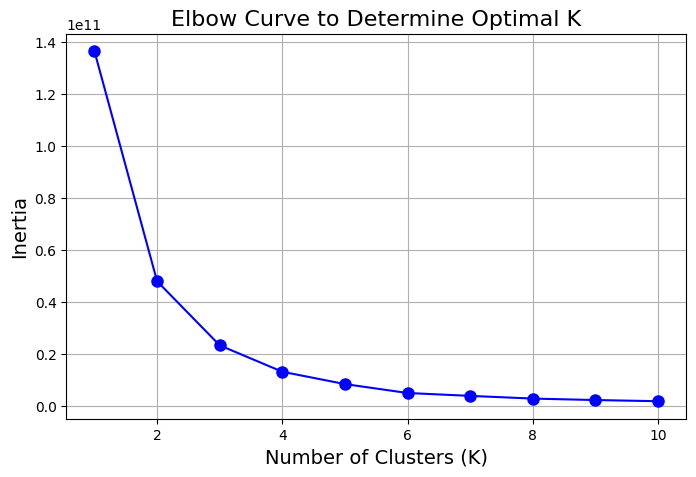

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir a faixa de valores de K
range_k = range(1, 11)

# Lista para armazenar as inércias
inertia_values = []

# Calcular K-Means para cada valor de K e armazenar a inertia
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']])
    inertia_values.append(kmeans.inertia_)

# Plotar a curva de cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia_values, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Curve to Determine Optimal K', fontsize=16)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Correlations with cluster_k2:
age                             0.082623
spending_score                 -0.009928
gender_bool                     0.086172
annual_income                  -0.805486
spending_score/annual_income    0.466758
Name: cluster_k2, dtype: float64


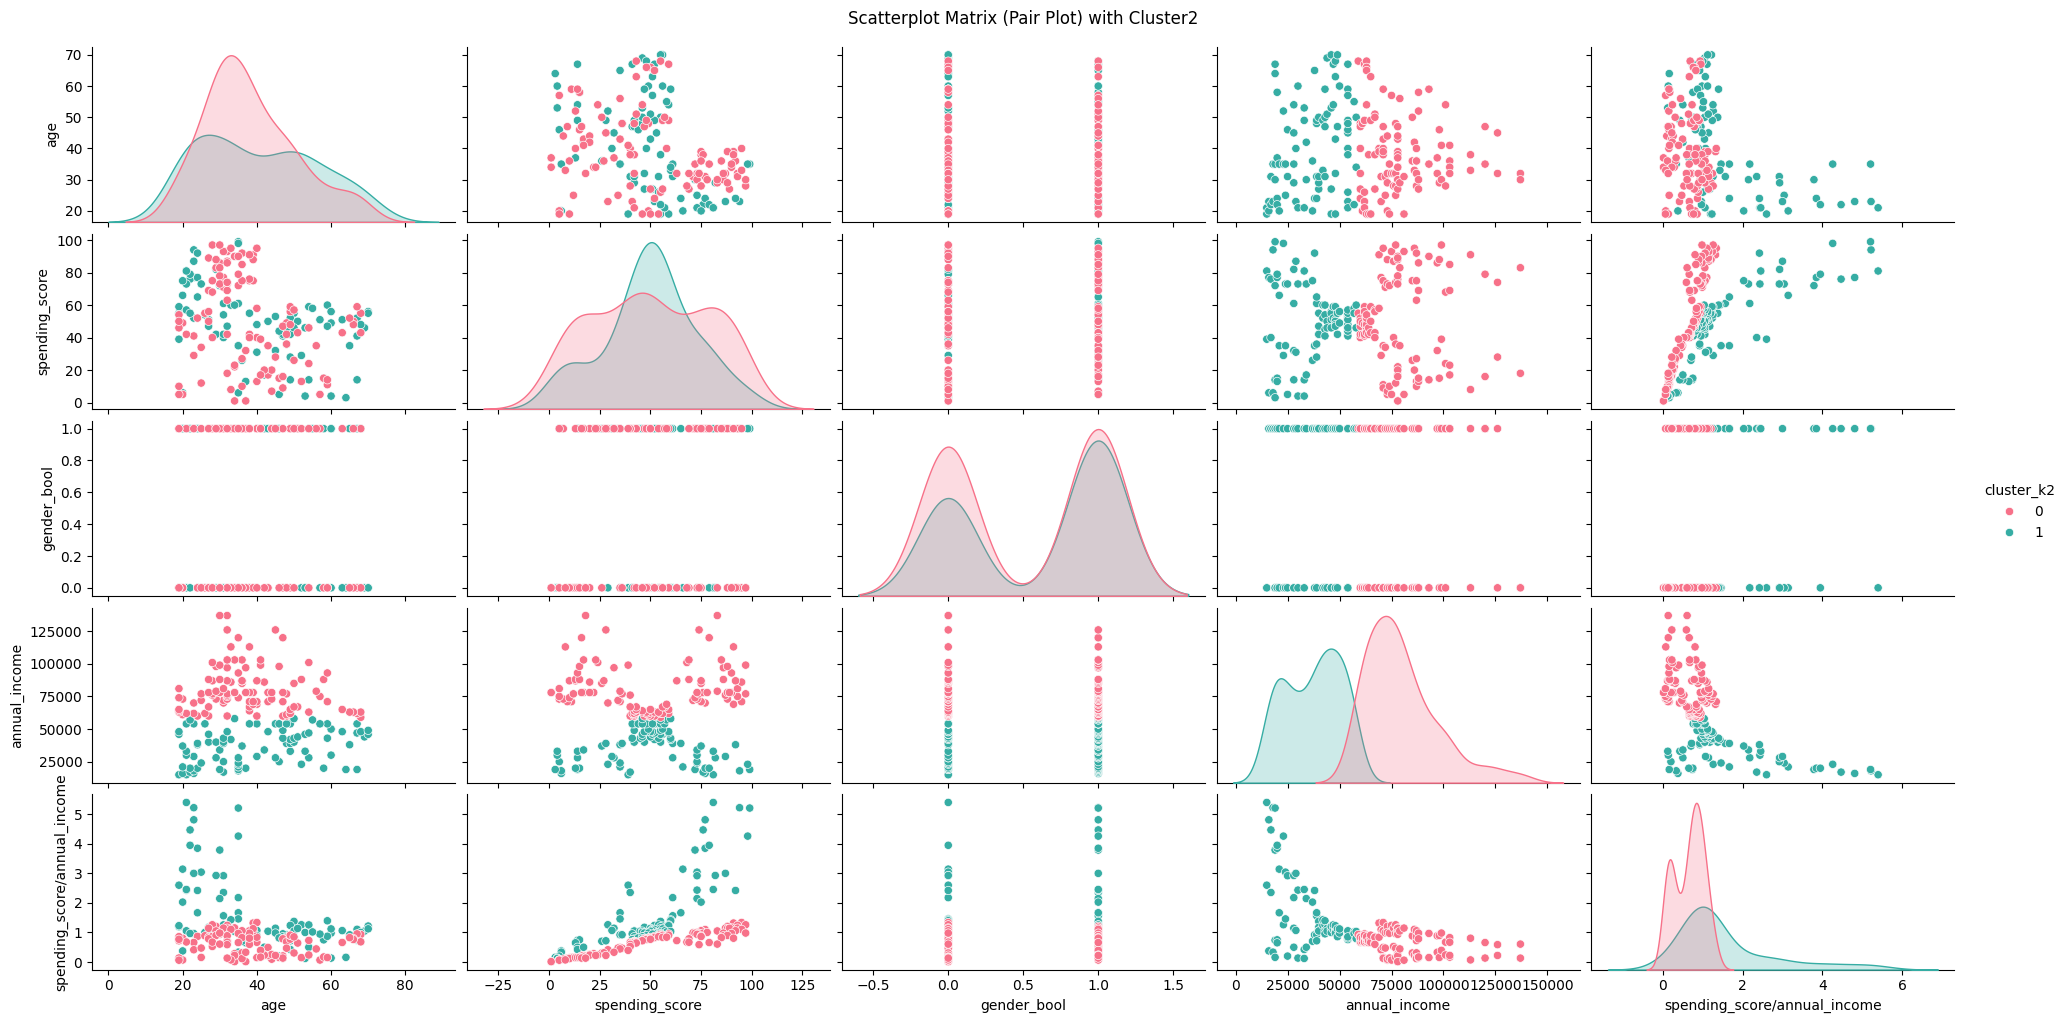

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Correlations with cluster_k3:
age                            -0.057308
spending_score                  0.015653
gender_bool                    -0.094648
annual_income                   0.910746
spending_score/annual_income   -0.482740
Name: cluster_k3, dtype: float64


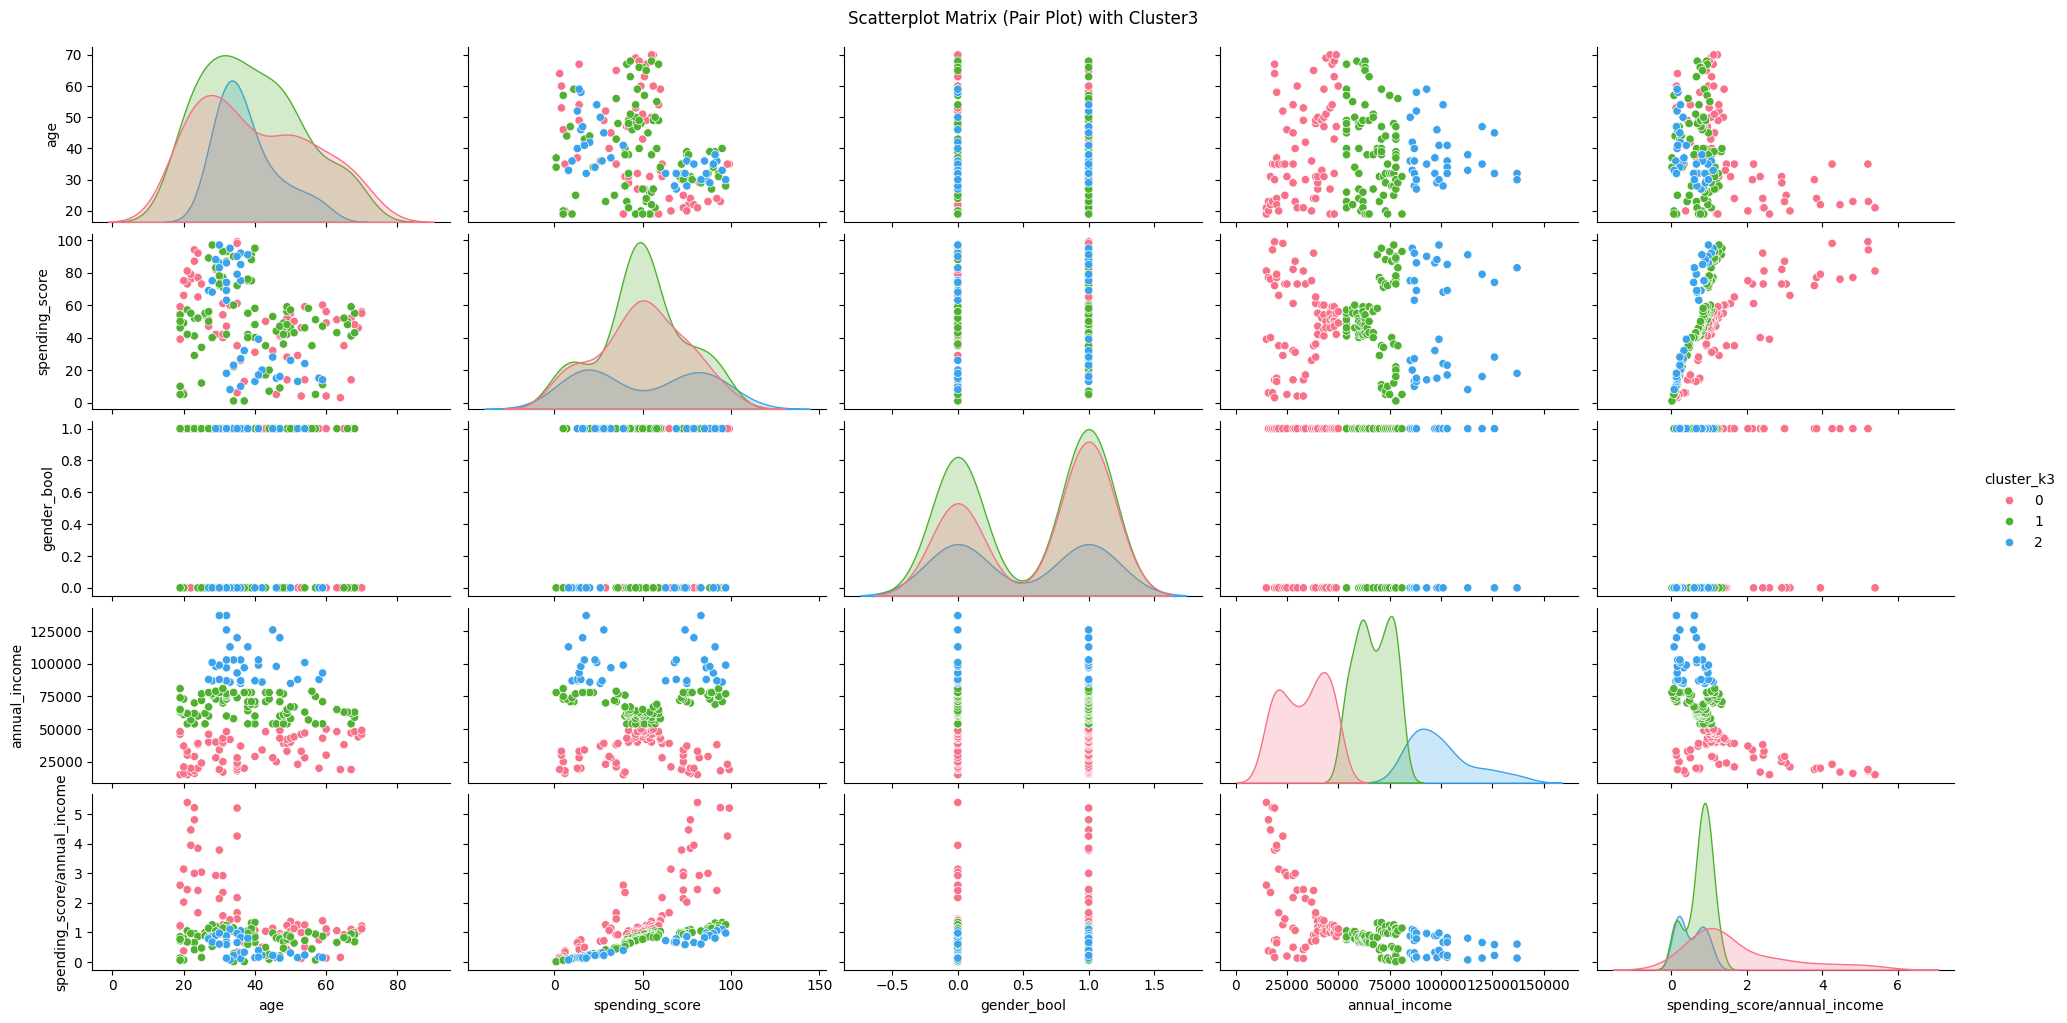

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Correlations with cluster_k4:
age                             0.176993
spending_score                  0.031296
gender_bool                    -0.018520
annual_income                   0.649799
spending_score/annual_income   -0.421864
Name: cluster_k4, dtype: float64


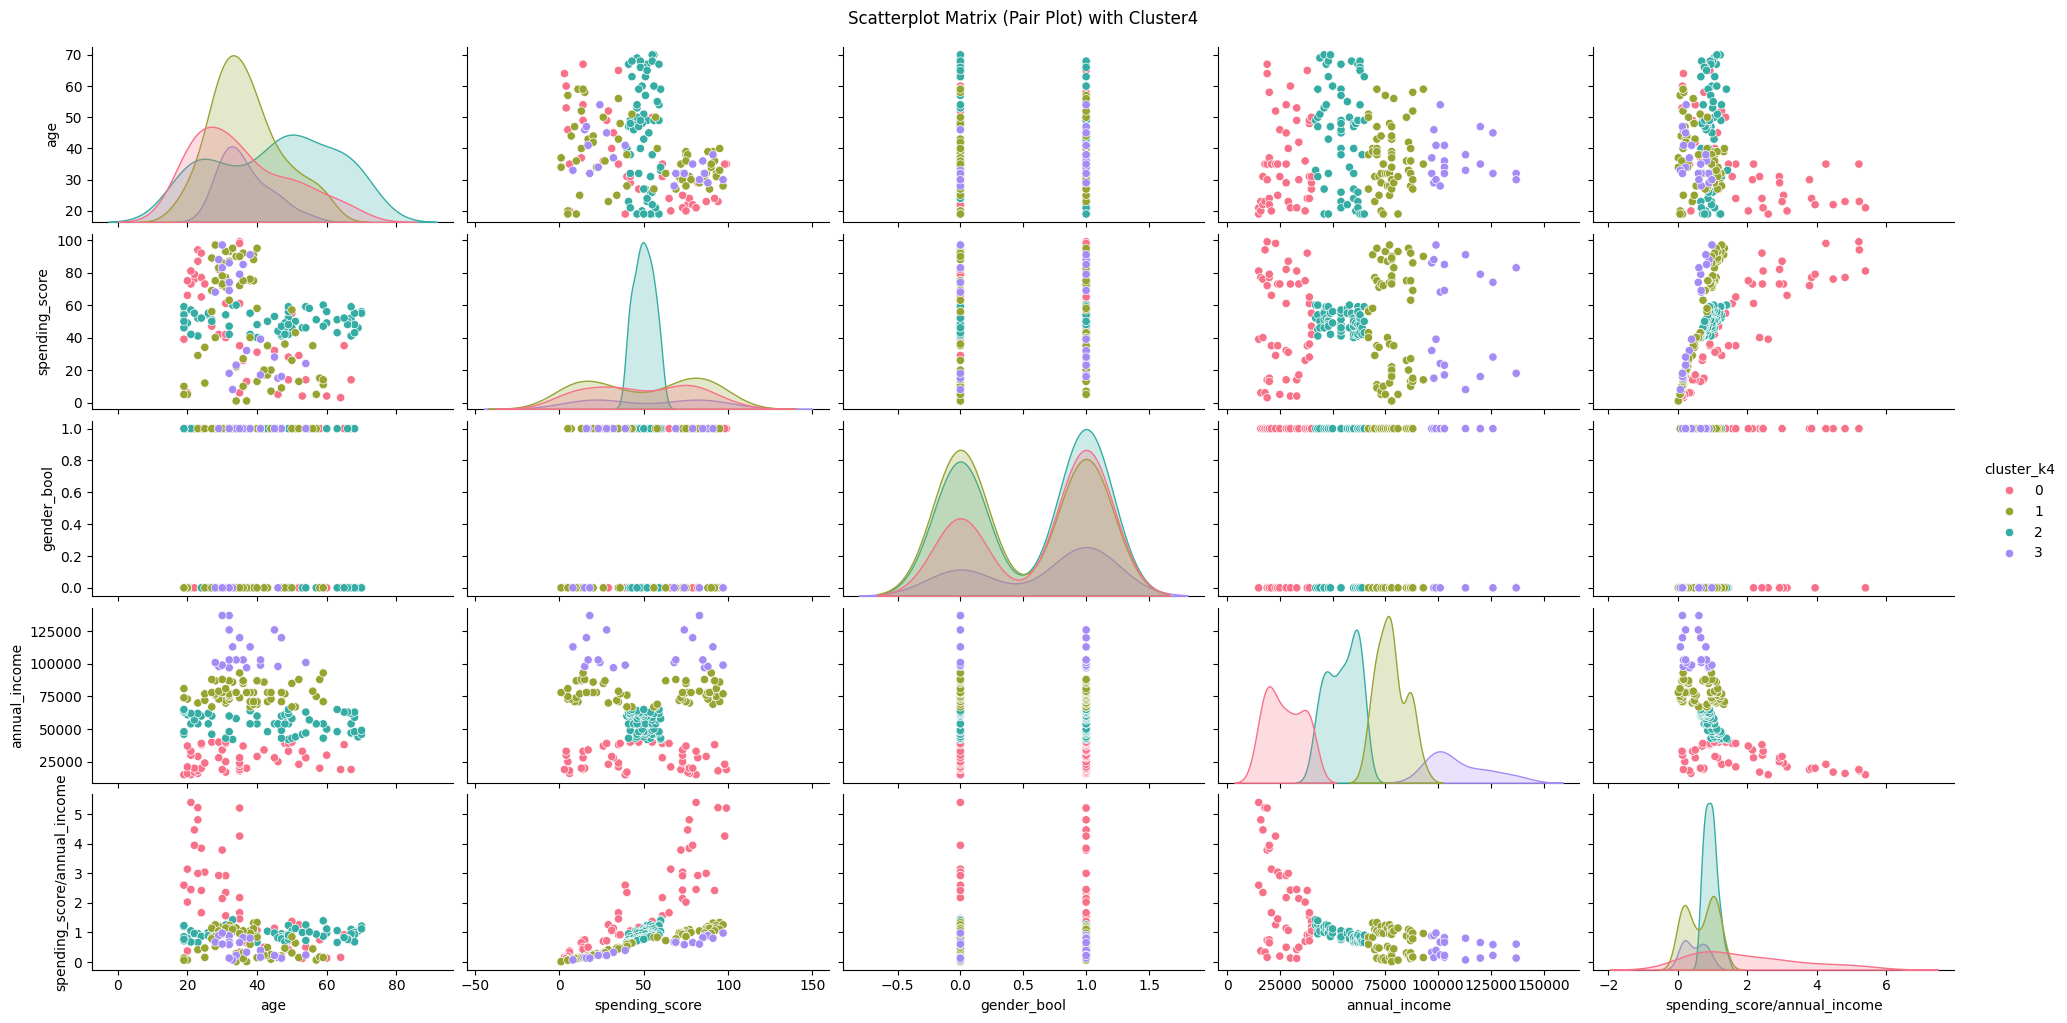

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Correlations with cluster_k5:
age                            -0.095440
spending_score                  0.008131
gender_bool                    -0.024904
annual_income                  -0.280107
spending_score/annual_income    0.328222
Name: cluster_k5, dtype: float64


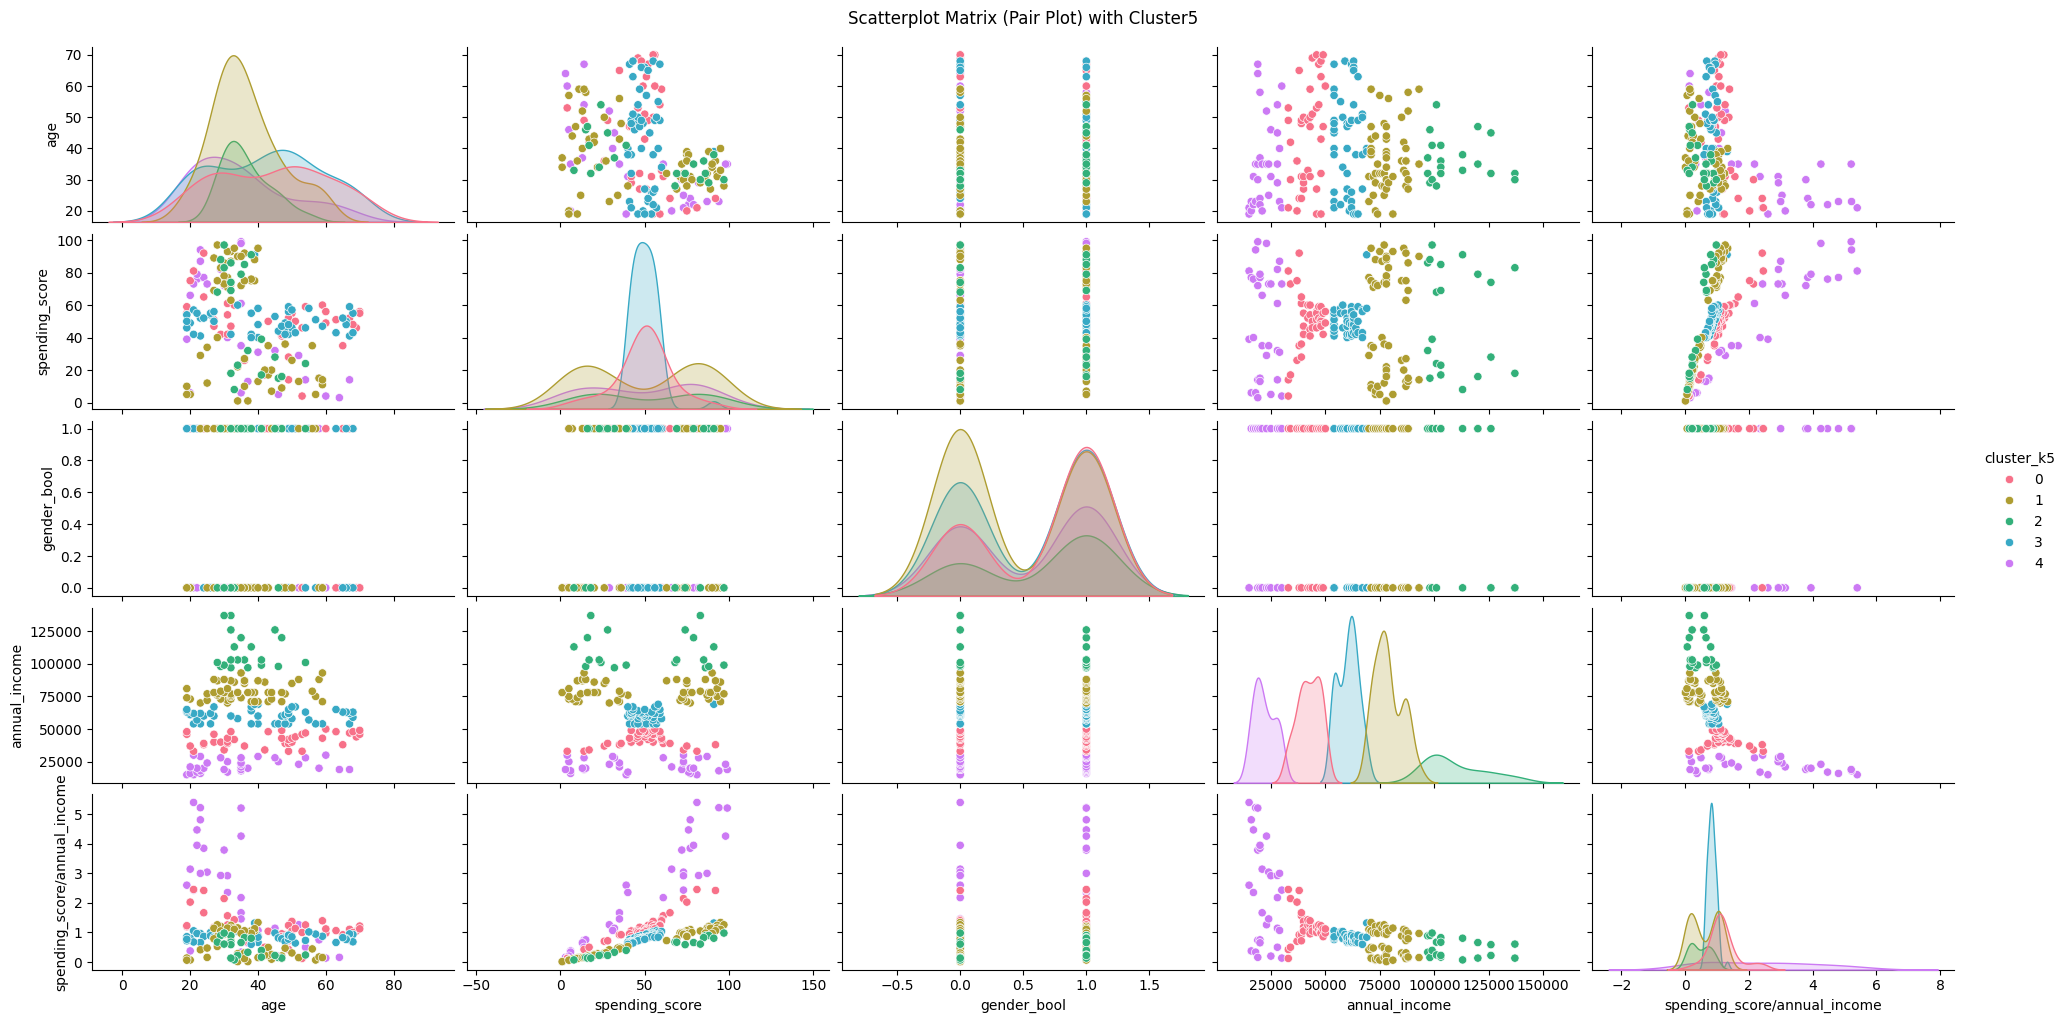

In [ ]:
k_values = [2, 3, 4, 5]
kmeans_models = {}

for k in k_values:
    # Armazenar o modelo KMeans no dicionário
    kmeans_models[f'kmeans_k{k}'] = KMeans(n_clusters=k, random_state=42)

    features = df[['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']]
    df[f'cluster_k{k}'] = kmeans_models[f'kmeans_k{k}'].fit_predict(features)

    df_cluster_analysis = df[['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income', f'cluster_k{k}']]
    correlation_with_cluster = df_cluster_analysis.corr()[f'cluster_k{k}'].drop(f'cluster_k{k}')
    print(f"Correlations with cluster_k{k}:")
    print(correlation_with_cluster)

    palette = sns.color_palette('husl', len(df[f'cluster_k{k}'].unique()))
    pairplot = sns.pairplot(df, vars=['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income'],
                            hue=f'cluster_k{k}', palette=palette, height=2, aspect=2)
    plt.suptitle(f'Scatterplot Matrix (Pair Plot) with Cluster{k}', y=1.02)
    plt.show()

De acordo com a curva acima, o número ideal de clusters K é 3, sem preder informações significativas sobre a estrutura dos dados nem aumentar a complexidade sem ganhos significativos.

## Clusterização (K=3)

Tarefa 6: Crie novamente o cluster com kmeans com a quantidade de n_clusters ajustada. Compare os resultados e comente

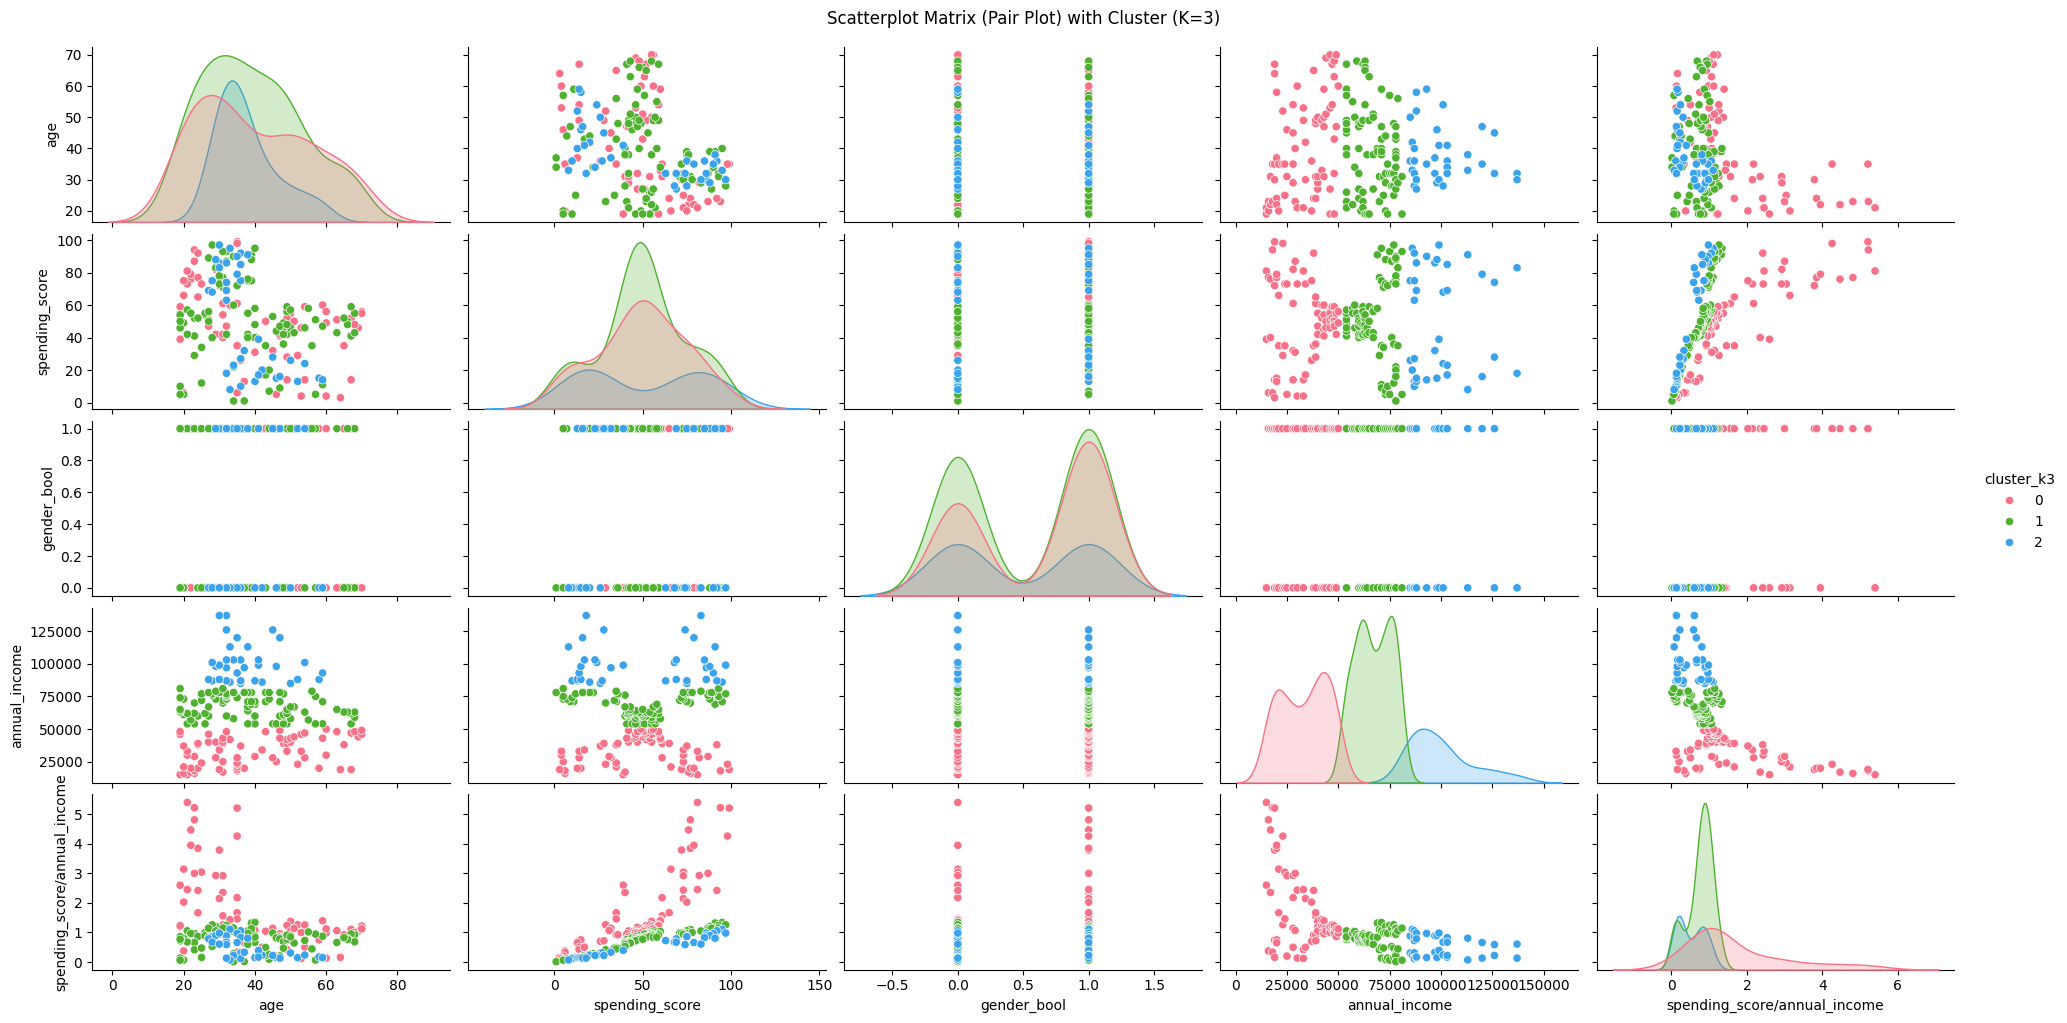

In [ ]:
# Definir uma paleta de cores distinta para os clusters
palette = sns.color_palette('husl', len(df['cluster_k3'].unique()))

# Criar o pairplot com a paleta de cores personalizada
pairplot = sns.pairplot(df, vars=['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income'],
                        hue='cluster_k3', palette=palette, height=2, aspect=2)

# Ajustar o título
plt.suptitle('Scatterplot Matrix (Pair Plot) with Cluster (K=3)', y=1.02)

# Mostrar o gráfico
plt.show()


In [ ]:
# Selecionar apenas as colunas de interesse e a coluna de cluster
df_cluster_analysis = df[['age', 'spending_score', 'gender_bool', 'annual_income','spending_score/annual_income', 'cluster_k3']]

# Calcular a correlação da coluna de cluster com as outras colunas
correlation_with_cluster = df_cluster_analysis.corr()['cluster_k3'].drop('cluster_k3')

# Exibir a correlação
print(correlation_with_cluster)


age                            -0.057308
spending_score                  0.015653
gender_bool                    -0.094648
annual_income                   0.910746
spending_score/annual_income   -0.482740
Name: cluster_k3, dtype: float64


Tarefa 7:  Quais foram os centroids? Imprima os centroids

In [ ]:
# Calcular as médias gerais dos campos utilizados na clusterização
mean_values = df[['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']].mean()
features_names = ['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']

# Obter os centróides dos clusters
centroids_k3 = kmeans_models['kmeans_k3'].cluster_centers_

# Exibir os centróides com nomes e as médias gerais
print("Centroids for cluster_k3 vs. Overall Means:")
print("-" * 50)

for i, centroid in enumerate(centroids_k3):
    print(f"Centroid {i+1}:")
    for j, value in enumerate(centroid):
        print(f"  {features_names[j]}: {value:.2f} (Overall Mean: {mean_values[j]:.2f})")
    print("\n")

# Exibir as médias gerais
print("Overall Means:")
for j, mean in enumerate(mean_values):
    print(f"  {features_names[j]}: {mean:.2f}")


Centroids for cluster_k3 vs. Overall Means:
--------------------------------------------------
Centroid 1:
  age: 40.10 (Overall Mean: 39.28)
  spending_score: 49.53 (Overall Mean: 50.00)
  gender_bool: 0.62 (Overall Mean: 0.57)
  annual_income: 33291.67 (Overall Mean: 60750.00)
  spending_score/annual_income: 1.71 (Overall Mean: 1.06)


Centroid 2:
  age: 39.19 (Overall Mean: 39.28)
  spending_score: 50.12 (Overall Mean: 50.00)
  gender_bool: 0.55 (Overall Mean: 0.57)
  annual_income: 67204.55 (Overall Mean: 60750.00)
  spending_score/annual_income: 0.76 (Overall Mean: 1.06)


Centroid 3:
  age: 37.83 (Overall Mean: 39.28)
  spending_score: 50.64 (Overall Mean: 50.00)
  gender_bool: 0.50 (Overall Mean: 0.57)
  annual_income: 99888.89 (Overall Mean: 60750.00)
  spending_score/annual_income: 0.52 (Overall Mean: 1.06)


Overall Means:
  age: 39.28
  spending_score: 50.00
  gender_bool: 0.57
  annual_income: 60750.00
  spending_score/annual_income: 1.06


<ipython-input-49-6e46e1b48b4b>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  {features_names[j]}: {value:.2f} (Overall Mean: {mean_values[j]:.2f})")


# Resultados

Tarefa 8: Mostre o gráfico do resultado com os centroids

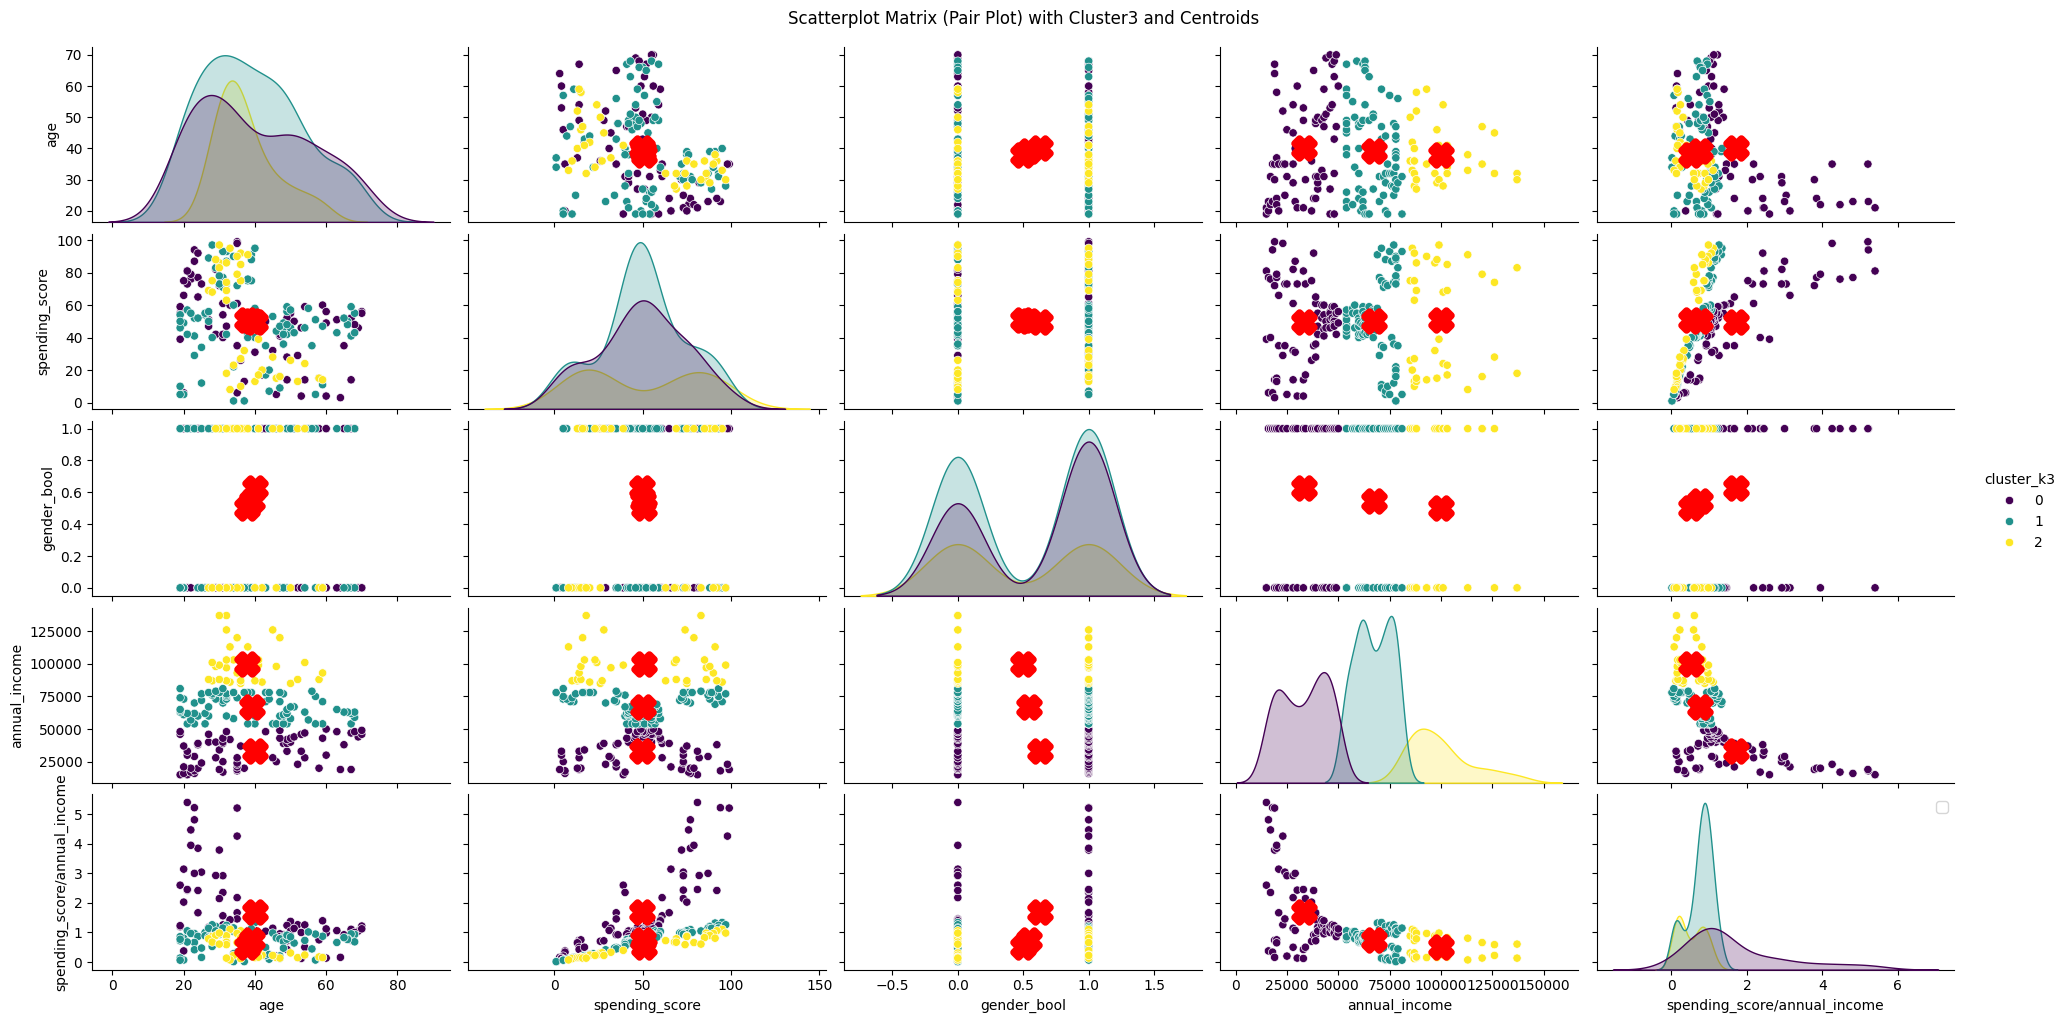

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Criação do pairplot com os clusters
pairplot = sns.pairplot(df, vars=['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income'], hue='cluster_k3', palette='viridis', height=2, aspect=2)

# Adicionando os centróides nos gráficos de dispersão
centroids = centroids_k3  # Se já estiver calculado anteriormente
for i, var1 in enumerate(['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']):
    for j, var2 in enumerate(['age', 'spending_score', 'gender_bool', 'annual_income', 'spending_score/annual_income']):
        if i != j:
            ax = pairplot.axes[i, j]
            ax.scatter(centroids[:, j], centroids[:, i], marker='X', color='red', s=200, linewidths=5, label='Centroids')

# Ajustar título e legenda
plt.suptitle('Scatterplot Matrix (Pair Plot) with Cluster3 and Centroids', y=1.02)
plt.legend(loc='upper right')
plt.show()


Tarefa 9: Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a campanha de marketing?

De acordo com a divisão dos clusters, que agrupou os clientes, principalmente, de acordo com a renda anual, eu direcionaria esforços para os clientes do cluster 2. Neste grupo, os clientes possuem uma renda mais elevada o que leva a uma proporção score/renda mais baixo. Ou seja, é um grupo que tem um poder de compra maior do que reflete nos gastos, podendo aumentar os valores de compra se direcionados da forma correta.